## Insurance Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the insurance performance (test scores) is affected by other variables such as age, sex, bmi, children etc.


### 2) Data Collection
- Dataset Source - https://github.com/NeilPandey/Test_Dataset/blob/master/insurance.csv
- The data consists of 7 column and 1339 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/NeilPandey/Test_Dataset/master/insurance.csv')

#### Show Top 5 Records

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Shape of the dataset

In [7]:
df.shape

(1338, 7)

### 2.2 Dataset information

- age
- sex : sex of students  -> (Male/female)
- bmi
- children
- smoker : yes/no
- region
- charges

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [8]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [9]:
df.duplicated().sum()

1

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [12]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### 3.4 Checking the number of unique values of each column

In [13]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### 3.5 Check statistics of data set

In [14]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### 3.7 Exploring Data

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'smoker' variable:  ",end=" ")
print(df['smoker'].unique())

print("Categories in'region' variable:",end=" " )
print(df['region'].unique())

Categories in 'sex' variable:      ['female' 'male']
Categories in 'smoker' variable:   ['yes' 'no']
Categories in'region' variable: ['southwest' 'southeast' 'northwest' 'northeast']


In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']

We have 3 categorical features : ['sex', 'smoker', 'region']


In [18]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

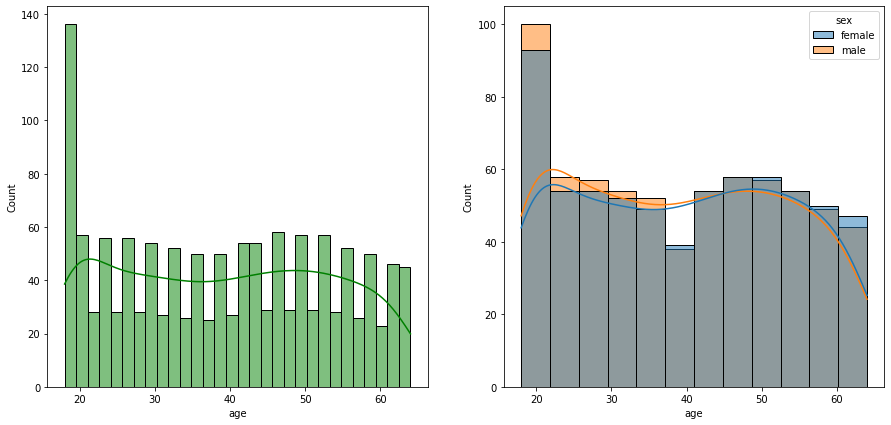

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='age',kde=True,hue='sex')
plt.show()

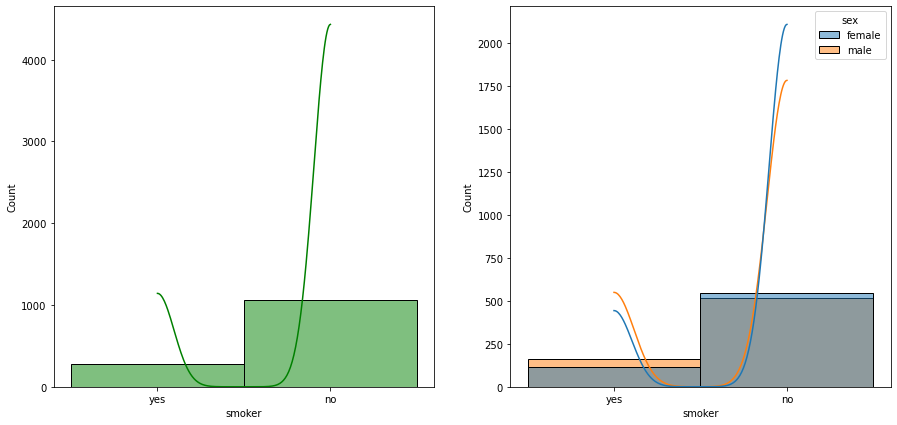

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='smoker',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='smoker',kde=True,hue='sex')
plt.show()

#####  Insights
- Male tend to smoke more then female.

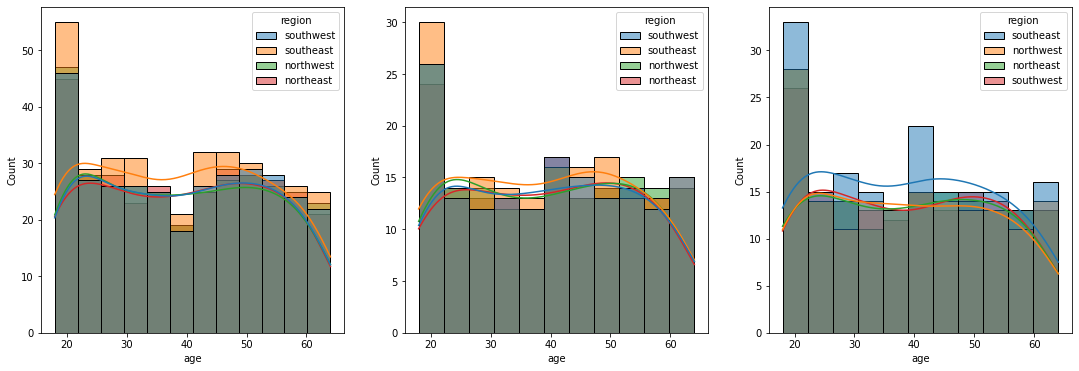

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='age',kde=True,hue='region')
plt.subplot(142)
sns.histplot(data=df[df.sex=='female'],x='age',kde=True,hue='region')
plt.subplot(143)
sns.histplot(data=df[df.sex=='male'],x='age',kde=True,hue='region')
plt.show()

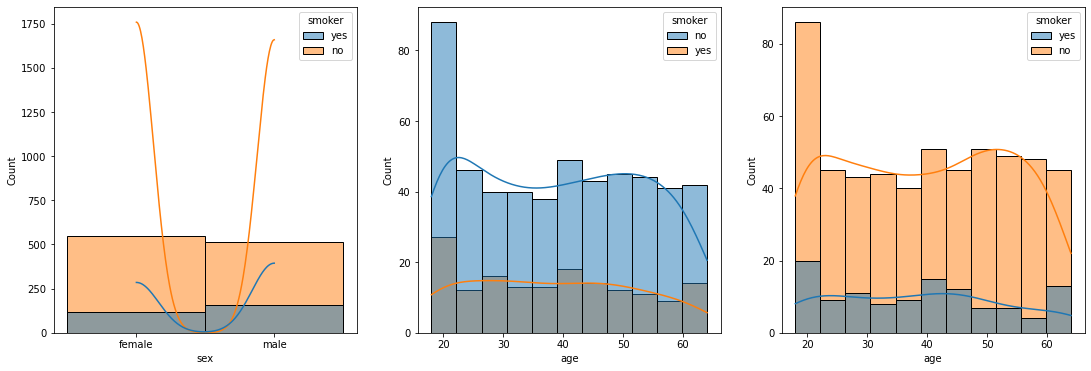

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='sex',kde=True,hue='smoker')
plt.subplot(142)
ax =sns.histplot(data=df[df.sex=='male'],x='age',kde=True,hue='smoker')
plt.subplot(143)
ax =sns.histplot(data=df[df.sex=='female'],x='age',kde=True,hue='smoker')
plt.show()

#### 4.2 Maximumum score of students in all three subjects

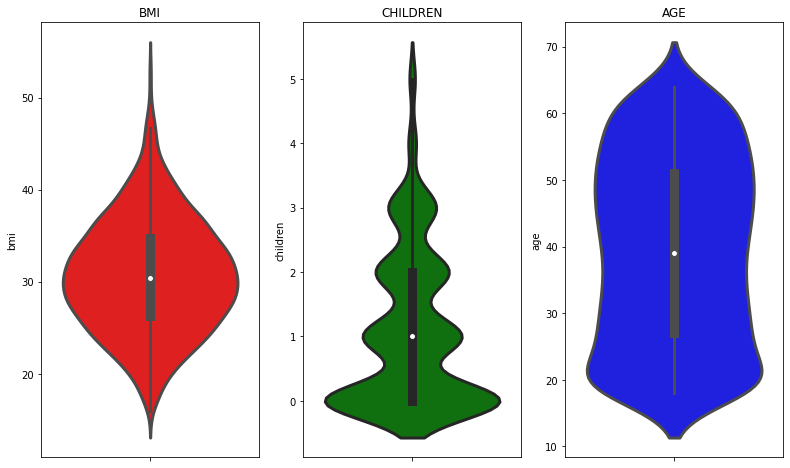

In [23]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('BMI')
sns.violinplot(y='bmi',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('CHILDREN')
sns.violinplot(y='children',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('AGE')
sns.violinplot(y='age',data=df,color='blue',linewidth=3)
plt.show()


#### 4.3 Multivariate analysis using pieplot

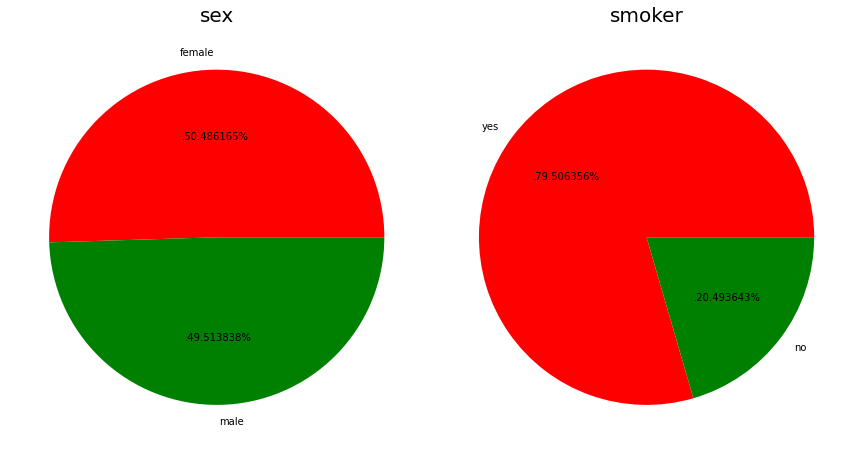

In [24]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['sex'].value_counts()
labels = 'female', 'male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('sex', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['smoker'].value_counts()
labels = 'yes', 'no'
color = ['red', 'green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('smoker', fontsize = 20)
plt.axis('off')



plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female is almost equal
- smoker are more than non smoker

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

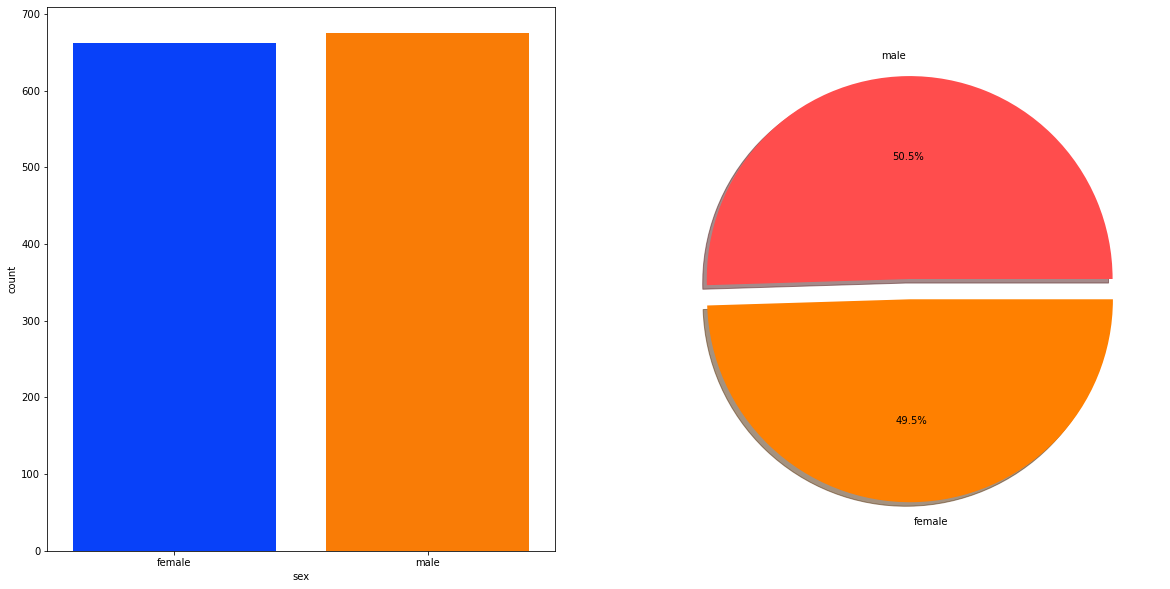

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['sex'],data=df,palette ='bright',ax=ax[0],saturation=0.95)

    
plt.pie(x=df['sex'].value_counts(),labels=['male','female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


#### Insights 
- Gender has balanced data 

#### BIVARIATE ANALYSIS ( Is gender has any impact on BMI Chidren & Charges ? ) 

In [26]:
gender_group = df.groupby('sex').mean()
gender_group

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.946667,30.943652,1.117037,13974.998864


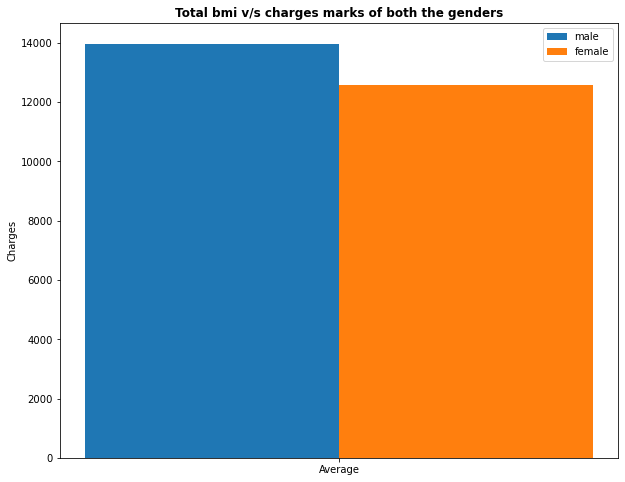

In [27]:
plt.figure(figsize=(10, 8))

X = ['Average']


female_scores = [gender_group['bmi'][0], gender_group['charges'][0]]
male_scores = [gender_group['bmi'][1], gender_group['charges'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'female')
  
plt.xticks(X_axis, X)
plt.ylabel("Charges")
plt.title("Total bmi v/s charges marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall health score than men.
- whereas males have higher bmi

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

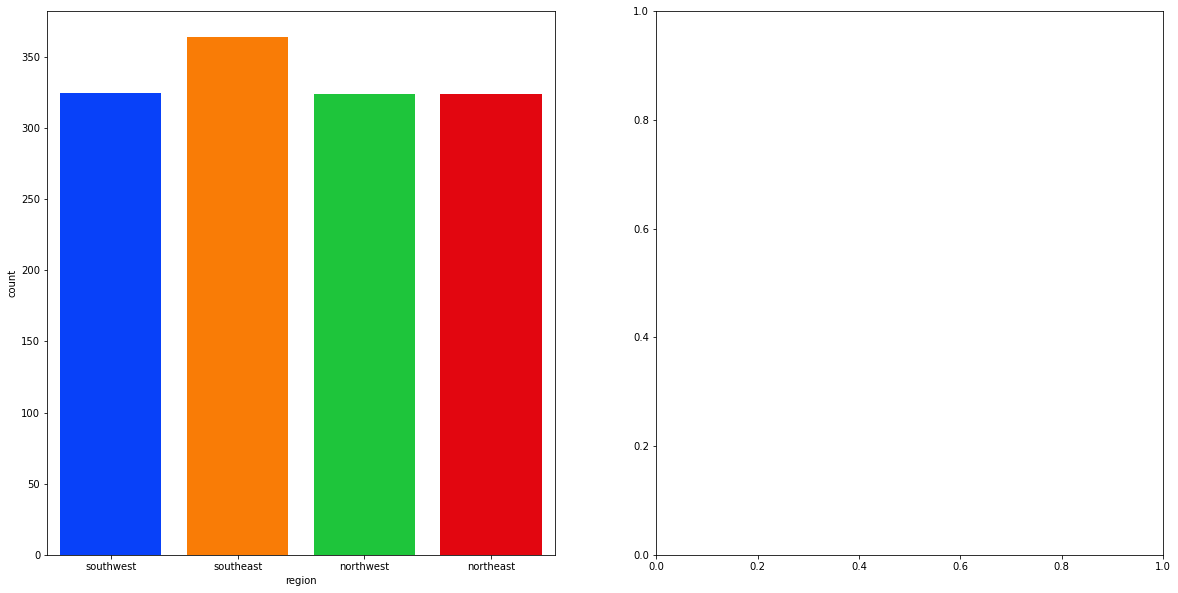

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['region'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
    
plt.show()   

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

Text(0.5, 1.0, 'AGE')

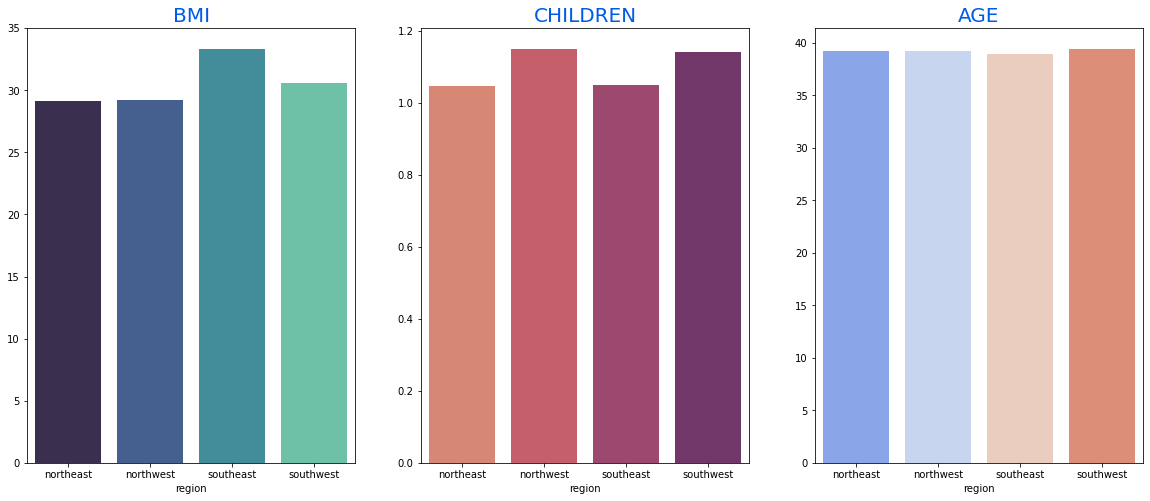

In [29]:
Group_data2=df.groupby('region')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['bmi'].mean().index,y=Group_data2['bmi'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('BMI',color='#005ce6',size=20)


sns.barplot(x=Group_data2['children'].mean().index,y=Group_data2['children'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('CHILDREN',color='#005ce6',size=20)


sns.barplot(x=Group_data2['age'].mean().index,y=Group_data2['age'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('AGE',color='#005ce6',size=20)


#### Insights 
- BMI is more for southeast region
- More children from northwest

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

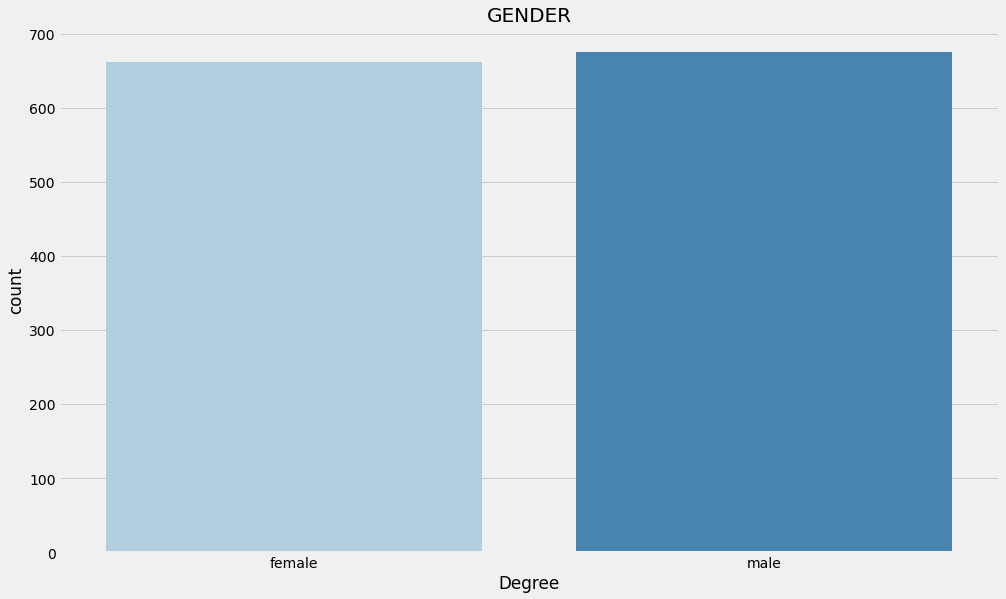

In [30]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['sex'], palette = 'Blues')
plt.title('GENDER', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

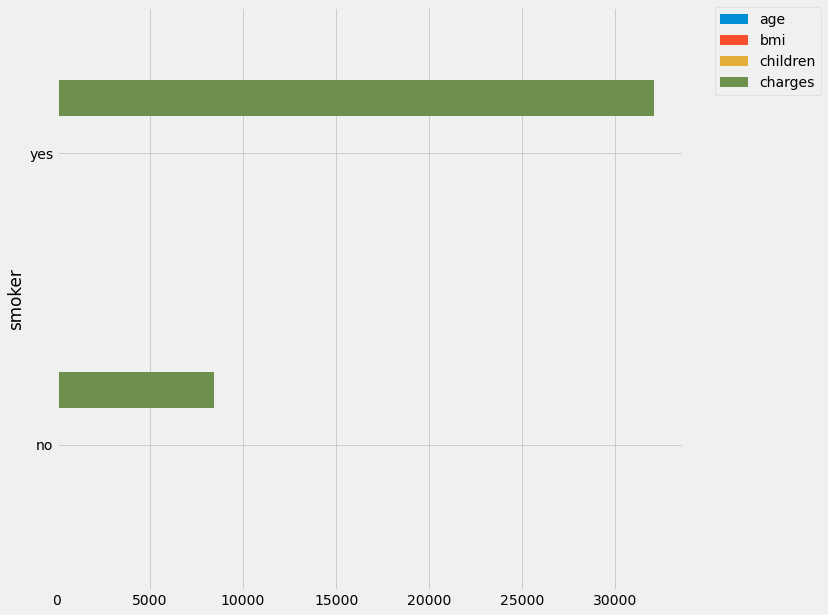

In [31]:
df.groupby('smoker').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### 4.4.6 CHECKING OUTLIERS

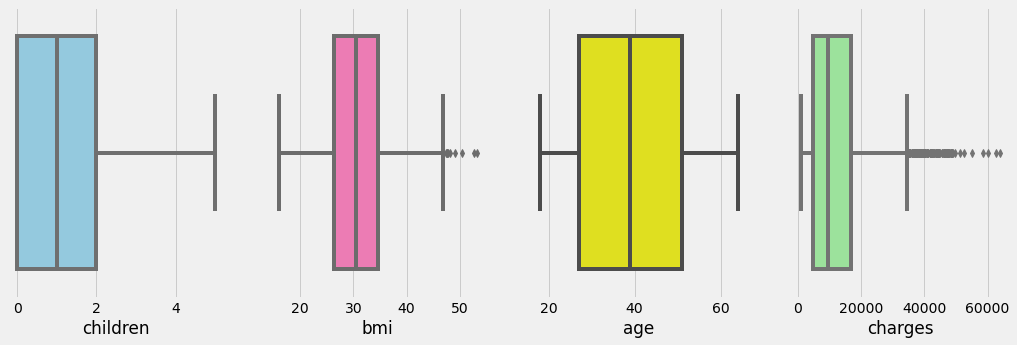

In [32]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['children'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['bmi'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['age'],color='yellow')
plt.subplot(144)
sns.boxplot(df['charges'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

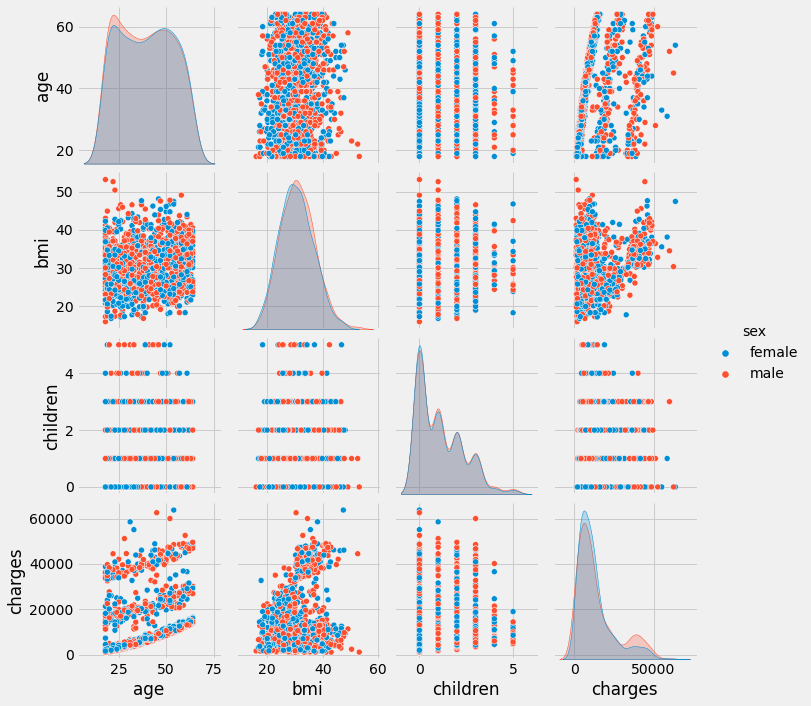

In [33]:
sns.pairplot(df,hue = 'sex')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Insurance is related with smoker, bmi